In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')
import platform
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 환경에서는 'Malgun Gothic' 폰트를 사용
else:
    plt.rcParams['font.family'] = 'AppleGothic'  # macOS나 Linux 등 다른 환경에서는 'AppleGothic' 폰트를 사용

matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import os
os.chdir(r"C:\Users\zlddp\OneDrive\바탕 화면\A3_대형마트") #current directory 지정
os.getcwd()

'C:\\Users\\zlddp\\OneDrive\\바탕 화면\\A3_대형마트'

In [3]:
#데이터 불러오기
df_raw = pd.read_csv("merged_df3_고객매출.csv")
df_raw

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership,2021Q3
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,Bronze,0
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,Silver,0
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,Silver,20962
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal,Silver,92754
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,Gold,109218
...,...,...,...,...,...,...,...,...,...,...
11512,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal,Bronze,0
11513,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal,Bronze,32162
11514,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal,Silver,0
11515,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,Gold,221117


In [4]:
def func1(row):
    return str(row)[0]+'0대'
df_raw['연령대'] = df_raw['연령'].apply(func1)
df_raw

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership,2021Q3,연령대
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,Bronze,0,50대
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,Silver,0,30대
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,Silver,20962,30대
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal,Silver,92754,70대
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,Gold,109218,40대
...,...,...,...,...,...,...,...,...,...,...,...
11512,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal,Bronze,0,40대
11513,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal,Bronze,32162,40대
11514,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal,Silver,0,60대
11515,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,Gold,221117,40대


In [5]:
df_raw.Gold_member.unique()

array(['normal', 'VIP'], dtype=object)

#### 기존 membership 1인 매출 비교

In [6]:
df_normal = df_raw[df_raw['Gold_member'] == 'normal']
df_vip = df_raw[df_raw['Gold_member'] == 'VIP']

In [7]:
df_normal

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership,2021Q3,연령대
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,Bronze,0,50대
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,Silver,0,30대
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,Silver,20962,30대
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal,Silver,92754,70대
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,Gold,109218,40대
...,...,...,...,...,...,...,...,...,...,...,...
11512,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal,Bronze,0,40대
11513,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal,Bronze,32162,40대
11514,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal,Silver,0,60대
11515,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,Gold,221117,40대


In [8]:
# 2021Q3 열의 총 합 구하기
total_usage = df_normal['2021Q3'].sum()

# 회원 수 구하기
num_members = len(df_normal)

# 1인당 사용 금액 계산
per_capita_usage = total_usage / num_members

per_capita_usage #기존 normal 고객 1인 매출

76145.10829207921

In [9]:
df_vip

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership,2021Q3,연령대
235,1019647424,정상회원,수지구-동천동,여,54.0,미신청,수신,VIP,VIP,1513146,50대
381,1035466112,정상회원,수지구-풍덕천동,여,47.0,미신청,수신,VIP,VIP,352539,40대
424,1039972480,정상회원,수지구-상현동,여,42.0,미신청,수신,VIP,VIP,637978,40대
483,104683968,정상회원,수지구-풍덕천동,여,72.0,미신청,.,VIP,VIP,578152,70대
525,1051939968,정상회원,수지구-상현동,여,46.0,미신청,수신,VIP,VIP,724011,40대
...,...,...,...,...,...,...,...,...,...,...,...
11407,980225984,정상회원,기타-기타,여,43.0,미신청,수신,VIP,VIP,476209,40대
11453,993938112,정상회원,수지구-신봉동,여,47.0,미신청,수신,VIP,VIP,1294326,40대
11455,994348288,정상회원,수지구-풍덕천동,여,32.0,미신청,수신,VIP,VIP,782996,30대
11475,99763712,정상회원,수지구-신봉동,여,48.0,미신청,수신,VIP,VIP,669564,40대


In [10]:
# 2021Q3 열의 총 합 구하기
total_usage2 = df_vip['2021Q3'].sum()

# 회원 수 구하기
num_members2 = len(df_vip)

# 1인당 사용 금액 계산
per_capita_usage2 = total_usage2 / num_members2

per_capita_usage2 #기존 vip 고객 1인 매출

772810.9951219512

#### 기존 membership별 모바일 수신 알람 확인

In [11]:
# normal 멤버십의 모바일알람여부 신청률 계산
normal_mobile_alarm_count = len(df_raw[(df_raw['Gold_member'] == 'normal') & (df_raw['모바일알람여부'] == '수신')])
normal_total_count = len(df_raw[df_raw['Gold_member'] == 'normal'])
normal_mobile_alarm_rate = normal_mobile_alarm_count / normal_total_count

# VIP 멤버십의 모바일알람여부 신청률 계산
vip_mobile_alarm_count = len(df_raw[(df_raw['Gold_member'] == 'VIP') & (df_raw['모바일알람여부'] == '수신')])
vip_total_count = len(df_raw[df_raw['Gold_member'] == 'VIP'])
vip_mobile_alarm_rate = vip_mobile_alarm_count / vip_total_count

normal_mobile_alarm_rate, vip_mobile_alarm_rate

(0.0655940594059406, 0.7658536585365854)

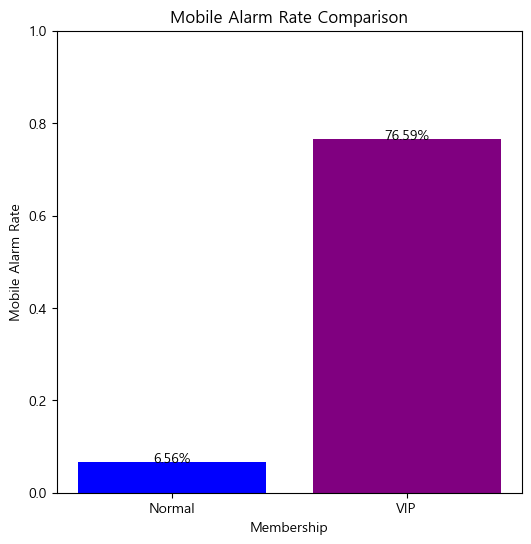

In [12]:
# 멤버십과 모바일알람여부 신청률 데이터
membership = ['Normal', 'VIP']
mobile_alarm_rate = [normal_mobile_alarm_rate, vip_mobile_alarm_rate]

# 그래프 크기 설정
plt.figure(figsize=(6, 6))

# 막대 그래프 그리기
plt.bar(membership, mobile_alarm_rate, color=['blue', 'purple'])
plt.title('Mobile Alarm Rate Comparison')
plt.xlabel('Membership')
plt.ylabel('Mobile Alarm Rate')

# 신청률 텍스트 표시
for i in range(len(membership)):
    plt.text(i, mobile_alarm_rate[i], f'{mobile_alarm_rate[i]*100:.2f}%', ha='center')

plt.ylim(0, 1)  # Y 축 범위 설정

# 그래프 출력
plt.show()

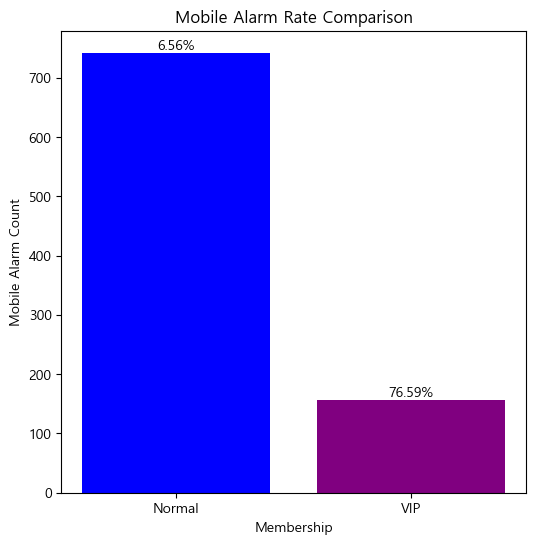

In [13]:
# 멤버십과 모바일알람여부 신청률 데이터
membership = ['Normal', 'VIP']
mobile_alarm_rate = [normal_mobile_alarm_rate, vip_mobile_alarm_rate]
mobile_alarm_counts = [normal_mobile_alarm_count, vip_mobile_alarm_count]

# 그래프 크기 설정
plt.figure(figsize=(6, 6))

# 막대 그래프 그리기
x = range(len(membership))
plt.bar(x, mobile_alarm_counts, color=['blue', 'purple'])
plt.title('Mobile Alarm Rate Comparison')
plt.xlabel('Membership')
plt.ylabel('Mobile Alarm Count')

# 신청률 텍스트 표시
for i in range(len(membership)):
    plt.text(x[i], mobile_alarm_counts[i], f'{mobile_alarm_rate[i]*100:.2f}%', ha='center', va='bottom')

plt.xticks(x, membership)  # X 축 레이블 설정

plt.show()

In [14]:
print("Normal 멤버십 모바일알람 신청자 수:", mobile_alarm_counts[0])
print("VIP 멤버십 모바일알람 신청자 수:", mobile_alarm_counts[1])

Normal 멤버십 모바일알람 신청자 수: 742
VIP 멤버십 모바일알람 신청자 수: 157


In [15]:
##### 가설검정 - 연령대에 따라 맴버십 등급의 유의미한 차이가 있는가? 

In [16]:
# 가설 검정 
# 연령대에 따라 맴버십 등급의 유의미한 차이가 있는가? 
# 귀무가설 : 연령대에 따라 맴버십 등급의 유의미한 차이가 없다.
# 대립가설 : 연령대에 따라 맴버십 등급의 유의미한 차이가 있다.
import scipy.stats as stats

In [17]:
df_cross = pd.crosstab(df_raw['연령대'], df_raw['Gold_member'])
df_cross

Gold_member,VIP,normal
연령대,,
10대,0,4
20대,0,52
30대,13,2113
40대,79,4391
50대,65,2472
60대,30,1422
70대,13,721
80대,4,132
90대,1,5


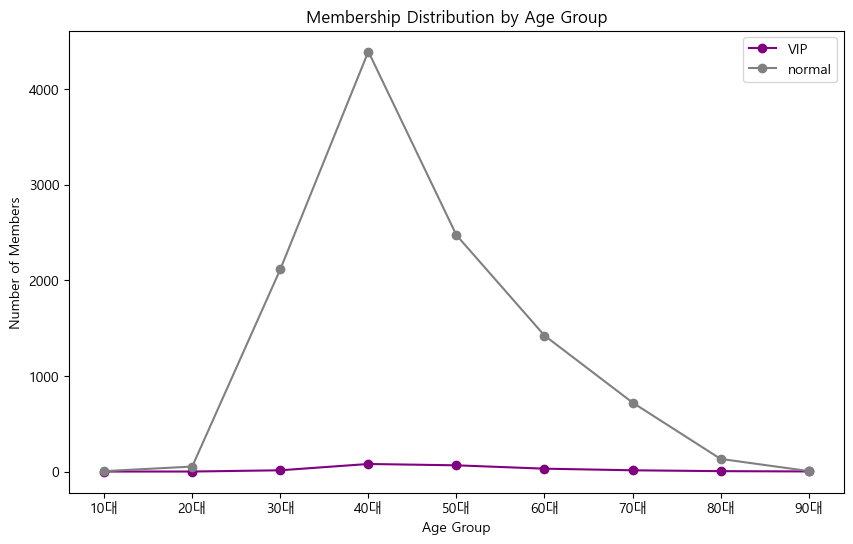

In [18]:
import matplotlib.pyplot as plt

# 데이터 프레임에서 필요한 데이터 추출
df_subset = df_cross[['VIP', 'normal']]

# 그래프를 그리기 위한 변수 설정
ages = df_subset.index.tolist()
memberships = df_subset.columns.tolist()
colors = ['purple', 'gray']

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 각 멤버십에 대한 분포 그래프 그리기
for i, membership in enumerate(memberships):
    values = df_subset[membership].values
    plt.plot(ages, values, marker='o', color=colors[i], label=membership)

# 그래프 제목과 축 레이블 설정
plt.title('Membership Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Members')

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()

In [19]:
df_cross['All'] = df_cross['VIP']+ df_cross['normal']
df_cross['normal_Ratio']= df_cross['normal'] / df_cross['All']
df_cross['VIP_Ratio']= df_cross['VIP'] / df_cross['All']

In [20]:
df_cross #Bronze Gold Silver VIP 연령대별 비율

Gold_member,VIP,normal,All,normal_Ratio,VIP_Ratio
연령대,,,,,
10대,0,4,4,1.000000,0.000000
20대,0,52,52,1.000000,0.000000
30대,13,2113,2126,0.993885,0.006115
40대,79,4391,4470,0.982327,0.017673
50대,65,2472,2537,0.974379,0.025621
60대,30,1422,1452,0.979339,0.020661
70대,13,721,734,0.982289,0.017711
80대,4,132,136,0.970588,0.029412
90대,1,5,6,0.833333,0.166667


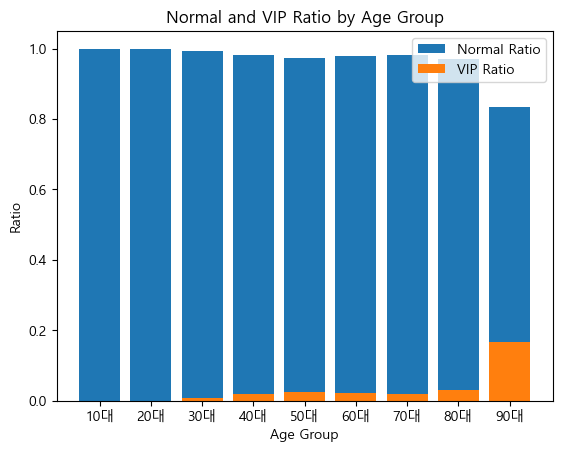

In [21]:
# 연령대와 normal_Ratio, VIP_Ratio 열 선택
age_groups = df_cross.index
normal_ratio = df_cross['normal_Ratio']
vip_ratio = df_cross['VIP_Ratio']

# 막대 그래프 생성
plt.bar(age_groups, normal_ratio, label='Normal Ratio')
plt.bar(age_groups, vip_ratio, label='VIP Ratio')

# 그래프 제목과 축 레이블 설정
plt.title('Normal and VIP Ratio by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Ratio')
plt.legend()

# 그래프 출력
plt.show()

In [22]:
stats.chi2_contingency(df_cross)
# P.value <0.05 / 대립가설 참 / 연령대에 따라 맴버십 등급의 유의미한 차이가 있다. 

Chi2ContingencyResult(statistic=673.4663166176078, pvalue=3.7253206082757593e-121, dof=32, expected_freq=array([[8.00676995e-02, 4.41817472e+00, 4.49824242e+00, 3.40429903e-03,
        1.10868267e-04],
       [9.34123161e-01, 5.15453717e+01, 5.24794949e+01, 3.97168220e-02,
        1.29346312e-03],
       [3.78364362e+01, 2.08783301e+03, 2.12566944e+03, 1.60872042e+00,
        5.23914155e-02],
       [7.95428113e+01, 4.38921113e+03, 4.46875394e+03, 3.38198196e+00,
        1.10141464e-01],
       [4.51492861e+01, 2.49135963e+03, 2.53650892e+03, 1.91964640e+00,
        6.25173839e-02],
       [2.58440741e+01, 1.42608862e+03, 1.45193269e+03, 1.09883208e+00,
        3.57858129e-02],
       [1.30688278e+01, 7.21144295e+02, 7.34213123e+02, 5.55657253e-01,
        1.80961649e-02],
       [2.42872022e+00, 1.34017966e+02, 1.36446687e+02, 1.03263737e-01,
        3.36300410e-03],
       [1.15653344e-01, 6.38180792e+00, 6.49746127e+00, 4.91732082e-03,
        1.60143052e-04]]))

#### 새로운 membership 비교

In [23]:
#데이터 불러오기
df_raw2 = pd.read_csv("merged_df3_고객매출.csv")
df_raw2

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership,2021Q3
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,Bronze,0
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,Silver,0
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,Silver,20962
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal,Silver,92754
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,Gold,109218
...,...,...,...,...,...,...,...,...,...,...
11512,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal,Bronze,0
11513,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal,Bronze,32162
11514,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal,Silver,0
11515,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,Gold,221117


In [24]:
def func1(row):
    return str(row)[0]+'0대'
df_raw2['연령대'] = df_raw2['연령'].apply(func1)
df_raw2

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership,2021Q3,연령대
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,Bronze,0,50대
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,Silver,0,30대
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,Silver,20962,30대
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal,Silver,92754,70대
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,Gold,109218,40대
...,...,...,...,...,...,...,...,...,...,...,...
11512,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal,Bronze,0,40대
11513,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal,Bronze,32162,40대
11514,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal,Silver,0,60대
11515,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,Gold,221117,40대


In [25]:
Bronze = df_raw2[df_raw2['membership'] == 'Bronze']
Silver = df_raw2[df_raw2['membership'] == 'Silver']
Gold = df_raw2[df_raw2['membership'] == 'Gold']
VIP = df_raw2[df_raw2['membership'] == 'VIP']

In [26]:
Bronze

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership,2021Q3,연령대
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,Bronze,0,50대
8,1000565888,정상회원,수지구-상현동,여,52.0,미신청,.,normal,Bronze,9859,50대
9,1000577024,정상회원,기타-기타,여,47.0,미신청,.,normal,Bronze,0,40대
12,1001042880,정상회원,수지구-신봉동,여,42.0,미신청,.,normal,Bronze,0,40대
14,100134912,정상회원,수지구-성복동,여,49.0,미신청,.,normal,Bronze,18263,40대
...,...,...,...,...,...,...,...,...,...,...,...
11509,999624896,정상회원,기흥구-보정동,여,54.0,미신청,.,normal,Bronze,0,50대
11510,999641600,정상회원,수지구-동천동,여,41.0,미신청,.,normal,Bronze,0,40대
11511,999654592,정상회원,기타-기타,여,47.0,미신청,.,normal,Bronze,0,40대
11512,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal,Bronze,0,40대


In [27]:
# Bronze 멤버십
bronze_total_usage = Bronze['2021Q3'].sum()
bronze_num_members = len(Bronze)
bronze_per_capita_usage = bronze_total_usage / bronze_num_members

# Silver 멤버십
silver_total_usage = Silver['2021Q3'].sum()
silver_num_members = len(Silver)
silver_per_capita_usage = silver_total_usage / silver_num_members

# Gold 멤버십
gold_total_usage = Gold['2021Q3'].sum()
gold_num_members = len(Gold)
gold_per_capita_usage = gold_total_usage / gold_num_members

# VIP 멤버십
vip_total_usage = VIP['2021Q3'].sum()
vip_num_members = len(VIP)
vip_per_capita_usage = vip_total_usage / vip_num_members

bronze_per_capita_usage, silver_per_capita_usage, gold_per_capita_usage, vip_per_capita_usage

(13006.239883339409, 46333.980172413794, 188121.18016997166, 579072.9681933842)

##### 가설검정 - 연령대에 따라 맴버십 등급의 유의미한 차이가 있는가? 

In [28]:
# 가설 검정 
# 연령대에 따라 맴버십 등급의 유의미한 차이가 있는가? 
# 귀무가설 : 연령대에 따라 맴버십 등급의 유의미한 차이가 없다.
# 대립가설 : 연령대에 따라 맴버십 등급의 유의미한 차이가 있다.
import scipy.stats as stats

In [29]:
df_cross = pd.crosstab(df_raw2['연령대'], df_raw2['membership'])
df_cross

membership,Bronze,Gold,Silver,VIP
연령대,,,,
10대,2,1,1,0
20대,27,8,15,2
30대,1129,261,651,85
40대,2166,673,1352,279
50대,1164,409,747,217
60대,636,251,443,122
70대,302,141,217,74
80대,58,21,52,5
90대,2,0,2,2


##### 가설검정 - 모바일 알람여부에 따라 맴버십 등급의 유의미한 차이가 있는가? 

In [59]:
df_cross = pd.crosstab(df_raw2['모바일알람여부'], df_raw2['membership'])
df_cross

membership,Bronze,Gold,Silver,VIP
모바일알람여부,,,,
.,5220,1589,3350,459
수신,266,176,130,327


In [60]:
stats.chi2_contingency(df_cross)
# P.value <0.05 / 대립가설 참 / 모바일알람여부에 따라 맴버십 등급의 유의미한 차이가 있다. 

Chi2ContingencyResult(statistic=1405.8340429399664, pvalue=1.5967319783173526e-304, dof=3, expected_freq=array([[5057.7709473 , 1627.22670834, 3208.3563428 ,  724.64600156],
       [ 428.2290527 ,  137.77329166,  271.6436572 ,   61.35399844]]))

##### 가설검정 - 거주지에 따라 맴버십 등급의 유의미한 차이가 있는가? 

In [61]:
df_cross = pd.crosstab(df_raw2['주소'], df_raw2['membership'])
df_cross

membership,Bronze,Gold,Silver,VIP
주소,,,,
광주-기타,23,3,13,0
광주-산성동,2,0,1,0
광주-오포읍,26,1,4,0
기타-궁내동,1,0,0,0
기타-금곡동,1,0,0,0
...,...,...,...,...
처인구-이동면,1,0,0,0
하남-기타,9,1,3,0
하남-위례동,1,0,0,0


In [63]:
stats.chi2_contingency(df_cross)
# P.value <0.05 / 대립가설 참 / 주소에 따라 맴버십 등급의 유의미한 차이가 있다. 

Chi2ContingencyResult(statistic=1122.5552547440348, pvalue=1.319061548875379e-100, dof=282, expected_freq=array([[1.85772337e+01, 5.97681688e+00, 1.17843188e+01, 2.66163063e+00],
       [1.42901797e+00, 4.59755145e-01, 9.06486064e-01, 2.04740818e-01],
       [1.47665191e+01, 4.75080316e+00, 9.36702266e+00, 2.11565512e+00],
       [4.76339324e-01, 1.53251715e-01, 3.02162021e-01, 6.82469393e-02],
       [4.76339324e-01, 1.53251715e-01, 3.02162021e-01, 6.82469393e-02],
       [9.52678649e-01, 3.06503430e-01, 6.04324043e-01, 1.36493879e-01],
       [5.29212989e+02, 1.70262655e+02, 3.35702006e+02, 7.58223496e+01],
       [4.76339324e-01, 1.53251715e-01, 3.02162021e-01, 6.82469393e-02],
       [4.76339324e-01, 1.53251715e-01, 3.02162021e-01, 6.82469393e-02],
       [2.38169662e+00, 7.66258574e-01, 1.51081011e+00, 3.41234697e-01],
       [4.76339324e-01, 1.53251715e-01, 3.02162021e-01, 6.82469393e-02],
       [4.76339324e-01, 1.53251715e-01, 3.02162021e-01, 6.82469393e-02],
       [4.76339324

In [64]:
##### 가설검정 - 배송서비스여부에 따라 맴버십 등급의 유의미한 차이가 있는가? 

In [68]:
df_cross = pd.crosstab(df_raw2['배송서비스신청여부'], df_raw2['membership'])
df_cross

membership,Bronze,Gold,Silver,VIP
배송서비스신청여부,,,,
미신청,5436,1086,3246,706
신청,50,679,234,80


In [69]:
stats.chi2_contingency(df_cross)
# P.value <0.05 / 대립가설 참 / 모바일알람여부에 따라 맴버십 등급의 유의미한 차이가 있다. 

Chi2ContingencyResult(statistic=2320.16735651692, pvalue=0.0, dof=3, expected_freq=array([[4989.17808457, 1605.1584614 , 3164.84501172,  714.8184423 ],
       [ 496.82191543,  159.8415386 ,  315.15498828,   71.1815577 ]]))

In [58]:
df_raw2

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership,2021Q3,연령대
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,Bronze,0,50대
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,Silver,0,30대
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,Silver,20962,30대
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal,Silver,92754,70대
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,Gold,109218,40대
...,...,...,...,...,...,...,...,...,...,...,...
11512,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal,Bronze,0,40대
11513,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal,Bronze,32162,40대
11514,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal,Silver,0,60대
11515,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,Gold,221117,40대


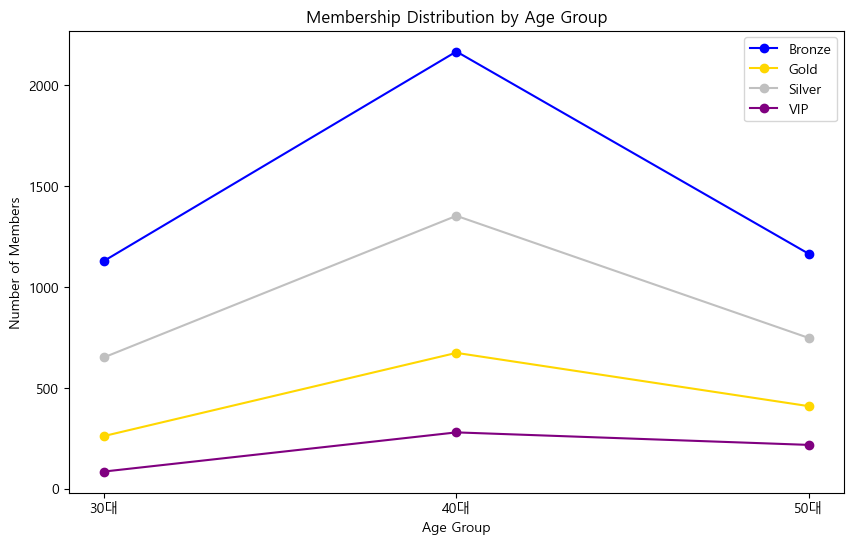

In [30]:
# 데이터 프레임에서 30, 40, 50대의 데이터를 추출
df_subset = df_cross.loc[['30대', '40대', '50대']]

# 그래프를 그리기 위한 변수 설정
ages = ['30대', '40대', '50대']
memberships = ['Bronze', 'Gold', 'Silver', 'VIP']
colors = ['blue', 'gold', 'silver', 'purple']

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 각 membership에 대한 분포 그래프 그리기
for i, membership in enumerate(memberships):
    values = df_subset.loc[:, membership].values
    plt.plot(ages, values, marker='o', color=colors[i], label=membership)

# 그래프 제목과 축 레이블 설정
plt.title('Membership Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Members')

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()

In [31]:
stats.chi2_contingency(df_cross)
# P.value <0.05 / 대립가설 참 / 연령대에 따라 맴버십 등급의 유의미한 차이가 있다. 

Chi2ContingencyResult(statistic=121.73305175262644, pvalue=4.761577221621896e-15, dof=24, expected_freq=array([[1.90535730e+00, 6.13006859e-01, 1.20864809e+00, 2.72987757e-01],
       [2.47696449e+01, 7.96908917e+00, 1.57124251e+01, 3.54884084e+00],
       [1.01269740e+03, 3.25813146e+02, 6.42396457e+02, 1.45092993e+02],
       [2.12923678e+03, 6.85035165e+02, 1.35066424e+03, 3.05063819e+02],
       [1.20847287e+03, 3.88799601e+02, 7.66585048e+02, 1.73142485e+02],
       [6.91644699e+02, 2.22521490e+02, 4.38739255e+02, 9.90945559e+01],
       [3.49633064e+02, 1.12486759e+02, 2.21786924e+02, 5.00932535e+01],
       [6.47821481e+01, 2.08422332e+01, 4.10940349e+01, 9.28158375e+00],
       [2.85803595e+00, 9.19510289e-01, 1.81297213e+00, 4.09481636e-01]]))

In [32]:
df_cross['All'] = df_cross['Bronze']+ df_cross['Gold']+ df_cross['Silver']+df_cross['VIP']

In [33]:
df_cross['Bronze_Ratio']= df_cross['Bronze'] / df_cross['All']
df_cross['Gold_Ratio']= df_cross['Gold'] / df_cross['All']
df_cross['Silver_Ratio']= df_cross['Silver'] / df_cross['All']
df_cross['VIP_Ratio']= df_cross['VIP'] / df_cross['All']

In [34]:
df_cross #Bronze Gold Silver VIP 연령대별 비율

membership,Bronze,Gold,Silver,VIP,All,Bronze_Ratio,Gold_Ratio,Silver_Ratio,VIP_Ratio
연령대,,,,,,,,,
10대,2,1,1,0,4,0.500000,0.250000,0.250000,0.000000
20대,27,8,15,2,52,0.519231,0.153846,0.288462,0.038462
30대,1129,261,651,85,2126,0.531044,0.122766,0.306209,0.039981
40대,2166,673,1352,279,4470,0.484564,0.150559,0.302461,0.062416
50대,1164,409,747,217,2537,0.458810,0.161214,0.294442,0.085534
60대,636,251,443,122,1452,0.438017,0.172865,0.305096,0.084022
70대,302,141,217,74,734,0.411444,0.192098,0.295640,0.100817
80대,58,21,52,5,136,0.426471,0.154412,0.382353,0.036765
90대,2,0,2,2,6,0.333333,0.000000,0.333333,0.333333


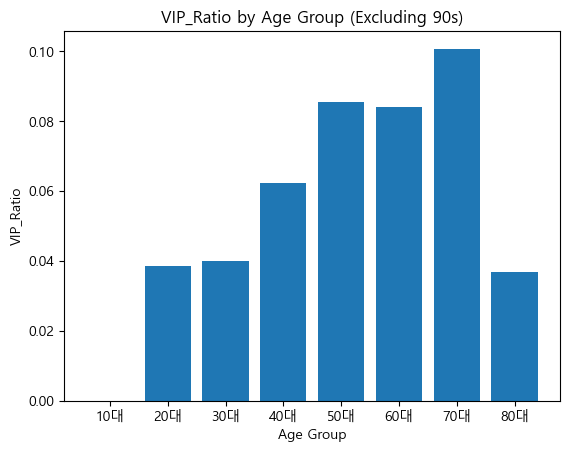

In [35]:
# 90대를 제외한 연령대와 VIP_Ratio 열 선택
age_groups = df_cross.index[:-1]
vip_ratio = df_cross['VIP_Ratio'][:-1]

# 막대 그래프 생성
plt.bar(age_groups, vip_ratio)

# 그래프 제목과 축 레이블 설정
plt.title('VIP_Ratio by Age Group (Excluding 90s)')
plt.xlabel('Age Group')
plt.ylabel('VIP_Ratio')

# 그래프 출력
plt.show()

#### membership별 모바일 수신 알람 확인

In [36]:
# 범주형 vs 범주형 검정 -> chi제곱 검정 
# 귀무가설 : 회원등급(범주형)에 따라 모바일알람여부(범주형) 유의미한 차이가 없다. 
# 대립가설 : 회원등급(범주형)에 따라 모바일알람여부(범주형) 유의미한 차이가 있다.
p2 = pd.crosstab(df_raw['membership'], df_raw['모바일알람여부']) 
stats.chi2_contingency(p2)
# P.value < 0.05 / 대립가설 참 / 회원등급(범주형)에 따라 모바일알람여부(범주형) 유의미한 차이가 있다.

Chi2ContingencyResult(statistic=1405.8340429399664, pvalue=1.5967319783173526e-304, dof=3, expected_freq=array([[5057.7709473 ,  428.2290527 ],
       [1627.22670834,  137.77329166],
       [3208.3563428 ,  271.6436572 ],
       [ 724.64600156,   61.35399844]]))

In [37]:
# Bronze 멤버십의 모바일알람여부 신청률 계산
bronze_mobile_alarm_count = len(df_raw[(df_raw['membership'] == 'Bronze') & (df_raw['모바일알람여부'] == '수신')])
bronze_total_count = len(df_raw[df_raw['membership'] == 'Bronze'])
bronze_mobile_alarm_rate = bronze_mobile_alarm_count / bronze_total_count

# Gold 멤버십의 모바일알람여부 신청률 계산
gold_mobile_alarm_count = len(df_raw[(df_raw['membership'] == 'Gold') & (df_raw['모바일알람여부'] == '수신')])
gold_total_count = len(df_raw[df_raw['membership'] == 'Gold'])
gold_mobile_alarm_rate = gold_mobile_alarm_count / gold_total_count

# Silver 멤버십의 모바일알람여부 신청률 계산
silver_mobile_alarm_count = len(df_raw[(df_raw['membership'] == 'Silver') & (df_raw['모바일알람여부'] == '수신')])
silver_total_count = len(df_raw[df_raw['membership'] == 'Silver'])
silver_mobile_alarm_rate = silver_mobile_alarm_count / silver_total_count

# VIP 멤버십의 모바일알람여부 신청률 계산
vip_mobile_alarm_count = len(df_raw[(df_raw['membership'] == 'VIP') & (df_raw['모바일알람여부'] == '수신')])
vip_total_count = len(df_raw[df_raw['membership'] == 'VIP'])
vip_mobile_alarm_rate = vip_mobile_alarm_count / vip_total_count

bronze_mobile_alarm_rate, gold_mobile_alarm_rate, silver_mobile_alarm_rate, vip_mobile_alarm_rate

(0.048487057965730954,
 0.09971671388101983,
 0.03735632183908046,
 0.41603053435114506)

In [38]:
# 멤버십 등급과 모바일알람여부 신청률 데이터
membership = ['Bronze', 'Gold', 'Silver', 'VIP']
mobile_alarm_rate = [bronze_mobile_alarm_rate, gold_mobile_alarm_rate, silver_mobile_alarm_rate, vip_mobile_alarm_rate]

# 멤버십 등급과 모바일알람여부 신청자 숫자 데이터
bronze_mobile_alarm_count = len(df_raw[(df_raw['membership'] == 'Bronze') & (df_raw['모바일알람여부'] == '수신')])
gold_mobile_alarm_count = len(df_raw[(df_raw['membership'] == 'Gold') & (df_raw['모바일알람여부'] == '수신')])
silver_mobile_alarm_count = len(df_raw[(df_raw['membership'] == 'Silver') & (df_raw['모바일알람여부'] == '수신')])
vip_mobile_alarm_count = len(df_raw[(df_raw['membership'] == 'VIP') & (df_raw['모바일알람여부'] == '수신')])

mobile_alarm_counts = [bronze_mobile_alarm_count, gold_mobile_alarm_count, silver_mobile_alarm_count, vip_mobile_alarm_count]

# 데이터프레임 생성
df = pd.DataFrame({'Membership': membership, 'Mobile Alarm Rate': mobile_alarm_rate, 'Mobile Alarm Count': mobile_alarm_counts})

df

,Membership,Mobile Alarm Rate,Mobile Alarm Count
0,Bronze,0.048487,266
1,Gold,0.099717,176
2,Silver,0.037356,130
3,VIP,0.416031,327


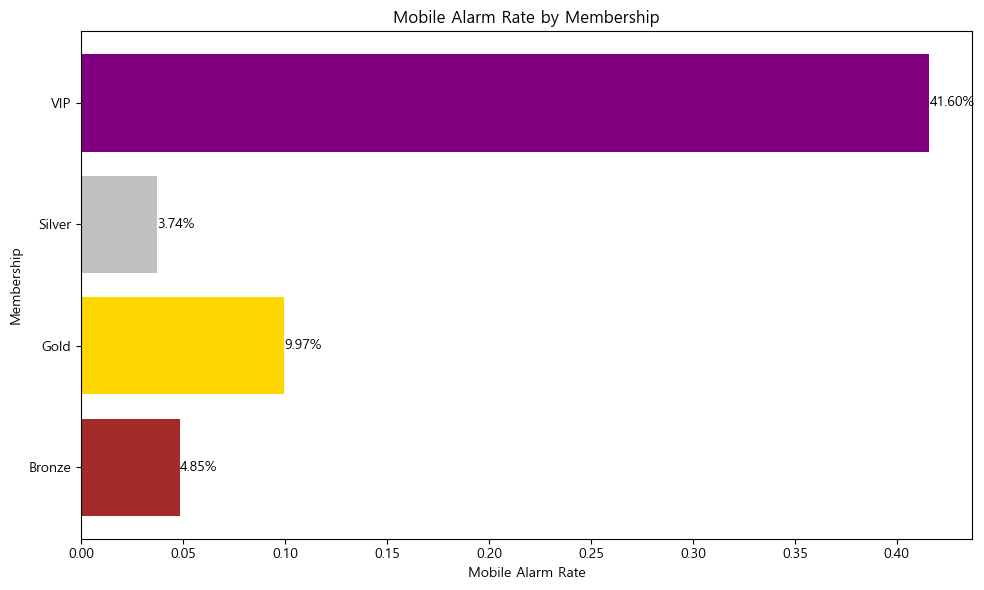

In [39]:
# 멤버십 등급과 모바일알람여부 신청률 데이터
membership = ['Bronze', 'Gold', 'Silver', 'VIP']
mobile_alarm_rate = [bronze_mobile_alarm_rate, gold_mobile_alarm_rate, silver_mobile_alarm_rate, vip_mobile_alarm_rate]

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 수평 막대 그래프 그리기
plt.barh(membership, mobile_alarm_rate, color=['brown', 'gold', 'silver', 'purple'])
plt.title('Mobile Alarm Rate by Membership')
plt.xlabel('Mobile Alarm Rate')
plt.ylabel('Membership')

# 신청률 텍스트 표시
for i in range(len(membership)):
    plt.text(mobile_alarm_rate[i], i, f'{mobile_alarm_rate[i]*100:.2f}%', va='center')

plt.tight_layout()  # subplot 간의 간격 조정

# 그래프 출력
plt.show()

#### Gold_member에서 normal과 VIP별로 성별 분포

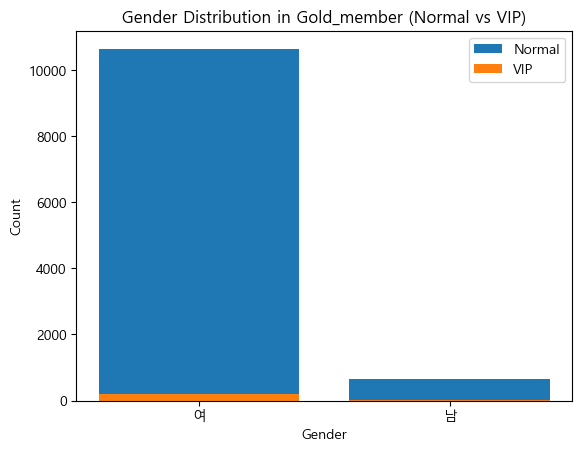

In [40]:
# normal과 VIP에 해당하는 데이터 선택
normal_data = df_raw[df_raw['Gold_member'] == 'normal']
vip_data = df_raw[df_raw['Gold_member'] == 'VIP']

# normal과 VIP 그룹의 성별 분포 계산
normal_gender_counts = normal_data['성별'].value_counts()
vip_gender_counts = vip_data['성별'].value_counts()

# 그래프 생성
plt.bar(normal_gender_counts.index, normal_gender_counts.values, label='Normal')
plt.bar(vip_gender_counts.index, vip_gender_counts.values, label='VIP')

# 그래프 제목과 축 레이블 설정
plt.title('Gender Distribution in Gold_member (Normal vs VIP)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()

# 그래프 출력
plt.show()

In [41]:
# normal과 VIP 그룹의 성별 분포 계산
normal_gender_counts = normal_data['성별'].value_counts()
vip_gender_counts = vip_data['성별'].value_counts()

# 성별 분포 출력
print("Normal Group:")
print(normal_gender_counts)
print("\nVIP Group:")
print(vip_gender_counts)


Normal Group:
성별
여    10659
남      653
Name: count, dtype: int64

VIP Group:
성별
여    194
남     11
Name: count, dtype: int64


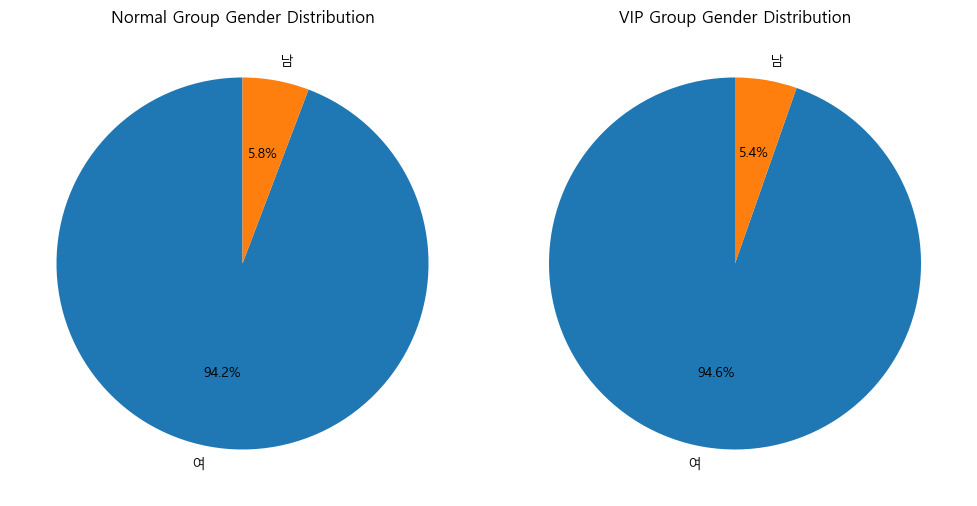

In [42]:
# normal과 VIP 그룹의 성별 분포 계산
normal_gender_counts = normal_data['성별'].value_counts()
vip_gender_counts = vip_data['성별'].value_counts()

# 성별 분포를 나타내기 위한 데이터와 레이블 설정
normal_labels = normal_gender_counts.index.tolist()
normal_values = normal_gender_counts.values.tolist()

vip_labels = vip_gender_counts.index.tolist()
vip_values = vip_gender_counts.values.tolist()

# pie 차트 그리기
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # 왼쪽 subplot
plt.pie(normal_values, labels=normal_labels, autopct='%1.1f%%', startangle=90)
plt.title('Normal Group Gender Distribution')

plt.subplot(1, 2, 2)  # 오른쪽 subplot
plt.pie(vip_values, labels=vip_labels, autopct='%1.1f%%', startangle=90)
plt.title('VIP Group Gender Distribution')

plt.tight_layout()  # subplot 간의 간격 조정

# 그래프 출력
plt.show()

#### membership에서 normal과 VIP별로 성별 분포

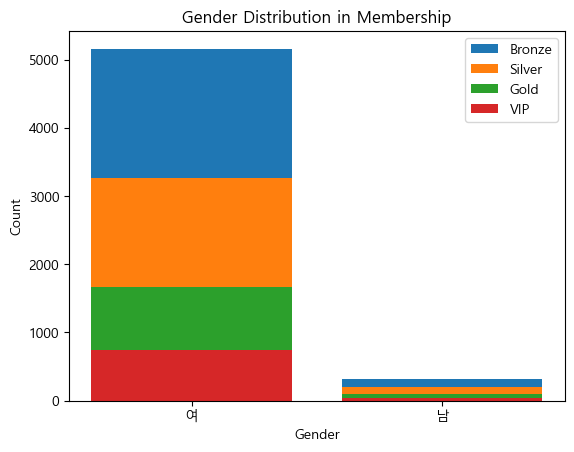

In [43]:
# Bronze, Silver, Gold, VIP에 해당하는 데이터 선택
bronze_data = df_raw[df_raw['membership'] == 'Bronze']
silver_data = df_raw[df_raw['membership'] == 'Silver']
gold_data = df_raw[df_raw['membership'] == 'Gold']
vip_data = df_raw[df_raw['membership'] == 'VIP']

# 각 그룹의 성별 분포 계산
bronze_gender_counts = bronze_data['성별'].value_counts()
silver_gender_counts = silver_data['성별'].value_counts()
gold_gender_counts = gold_data['성별'].value_counts()
vip_gender_counts = vip_data['성별'].value_counts()

# 그래프 생성
x = ['여', '남']
bronze_counts = [bronze_gender_counts['여'], bronze_gender_counts['남']]
silver_counts = [silver_gender_counts['여'], silver_gender_counts['남']]
gold_counts = [gold_gender_counts['여'], gold_gender_counts['남']]
vip_counts = [vip_gender_counts['여'], vip_gender_counts['남']]

plt.bar(x, bronze_counts, label='Bronze')
plt.bar(x, silver_counts, label='Silver')
plt.bar(x, gold_counts, label='Gold')
plt.bar(x, vip_counts, label='VIP')

# 그래프 제목과 축 레이블 설정
plt.title('Gender Distribution in Membership')
plt.xlabel('Gender')
plt.ylabel('Count')

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()

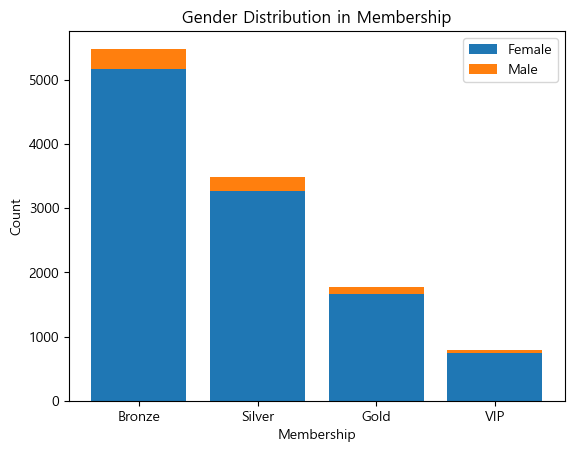

In [44]:
# Bronze, Silver, Gold, VIP에 해당하는 데이터 선택
bronze_data = df_raw[df_raw['membership'] == 'Bronze']
silver_data = df_raw[df_raw['membership'] == 'Silver']
gold_data = df_raw[df_raw['membership'] == 'Gold']
vip_data = df_raw[df_raw['membership'] == 'VIP']

# 각 그룹의 성별 분포 계산
bronze_gender_counts = bronze_data['성별'].value_counts()
silver_gender_counts = silver_data['성별'].value_counts()
gold_gender_counts = gold_data['성별'].value_counts()
vip_gender_counts = vip_data['성별'].value_counts()

# 그래프 생성
x = ['Bronze', 'Silver', 'Gold', 'VIP']
female_counts = [bronze_gender_counts['여'], silver_gender_counts['여'], gold_gender_counts['여'], vip_gender_counts['여']]
male_counts = [bronze_gender_counts['남'], silver_gender_counts['남'], gold_gender_counts['남'], vip_gender_counts['남']]

plt.bar(x, female_counts, label='Female')
plt.bar(x, male_counts, bottom=female_counts, label='Male')

# 그래프 제목과 축 레이블 설정
plt.title('Gender Distribution in Membership')
plt.xlabel('Membership')
plt.ylabel('Count')

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()


In [45]:
# Bronze, Silver, Gold, VIP에 해당하는 데이터 선택
bronze_data = df_raw[df_raw['membership'] == 'Bronze']
silver_data = df_raw[df_raw['membership'] == 'Silver']
gold_data = df_raw[df_raw['membership'] == 'Gold']
vip_data = df_raw[df_raw['membership'] == 'VIP']

# 각 그룹의 성별 분포 계산
bronze_gender_counts = bronze_data['성별'].value_counts()
silver_gender_counts = silver_data['성별'].value_counts()
gold_gender_counts = gold_data['성별'].value_counts()
vip_gender_counts = vip_data['성별'].value_counts()

# 성별 분포 출력
print("Bronze Membership:")
print(bronze_gender_counts)
print()

print("Silver Membership:")
print(silver_gender_counts)
print()

print("Gold Membership:")
print(gold_gender_counts)
print()

print("VIP Membership:")
print(vip_gender_counts)

Bronze Membership:
성별
여    5168
남     318
Name: count, dtype: int64

Silver Membership:
성별
여    3274
남     206
Name: count, dtype: int64

Gold Membership:
성별
여    1669
남      96
Name: count, dtype: int64

VIP Membership:
성별
여    742
남     44
Name: count, dtype: int64


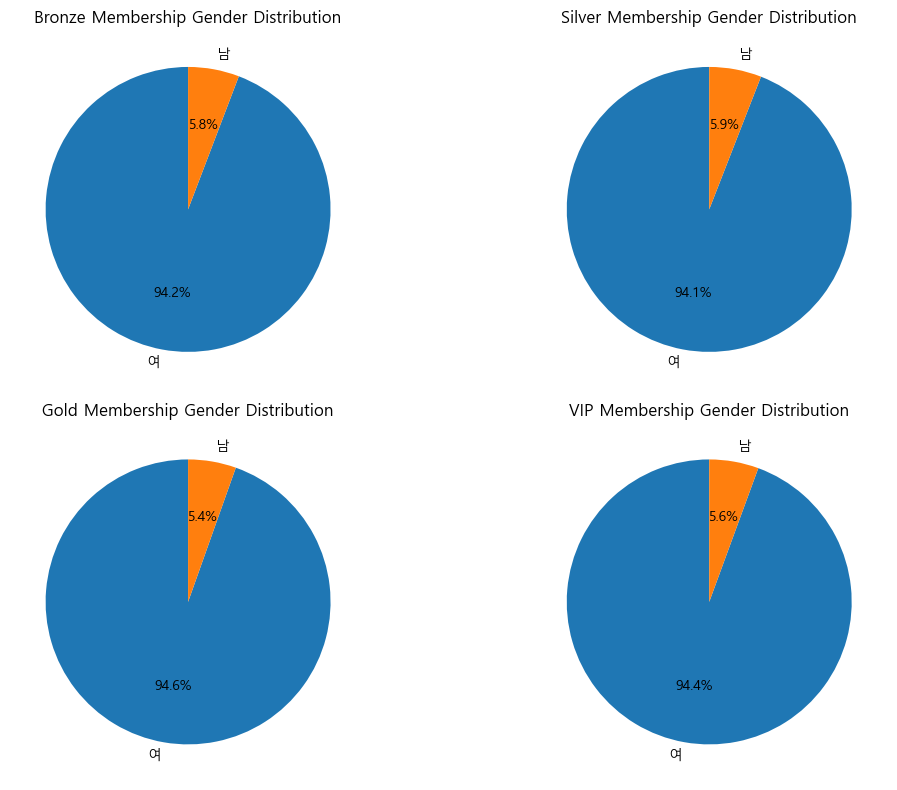

In [46]:
import matplotlib.pyplot as plt

# 각 멤버십의 성별 분포 계산
bronze_gender_counts = bronze_data['성별'].value_counts()
silver_gender_counts = silver_data['성별'].value_counts()
gold_gender_counts = gold_data['성별'].value_counts()
vip_gender_counts = vip_data['성별'].value_counts()

# 성별 분포를 나타내기 위한 데이터와 레이블 설정
bronze_labels = bronze_gender_counts.index.tolist()
bronze_values = bronze_gender_counts.values.tolist()

silver_labels = silver_gender_counts.index.tolist()
silver_values = silver_gender_counts.values.tolist()

gold_labels = gold_gender_counts.index.tolist()
gold_values = gold_gender_counts.values.tolist()

vip_labels = vip_gender_counts.index.tolist()
vip_values = vip_gender_counts.values.tolist()

# 멤버십별 성별 분포를 시각화하기 위한 pie 차트 그리기
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)  # 상단 왼쪽 subplot
plt.pie(bronze_values, labels=bronze_labels, autopct='%1.1f%%', startangle=90)
plt.title('Bronze Membership Gender Distribution')

plt.subplot(2, 2, 2)  # 상단 오른쪽 subplot
plt.pie(silver_values, labels=silver_labels, autopct='%1.1f%%', startangle=90)
plt.title('Silver Membership Gender Distribution')

plt.subplot(2, 2, 3)  # 하단 왼쪽 subplot
plt.pie(gold_values, labels=gold_labels, autopct='%1.1f%%', startangle=90)
plt.title('Gold Membership Gender Distribution')

plt.subplot(2, 2, 4)  # 하단 오른쪽 subplot
plt.pie(vip_values, labels=vip_labels, autopct='%1.1f%%', startangle=90)
plt.title('VIP Membership Gender Distribution')

plt.tight_layout()  # subplot 간의 간격 조정

# 그래프 출력
plt.show()

In [47]:
#데이터 불러오기
product = pd.read_csv("organic_data.csv")
product

,공급일자_,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각,weekday,구매시간대,판매시간대,행사품목,증정품여부,유기농물품
0,2021-01-01,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,NaN,10:04,금,10,아침,False,False,True
1,2021-01-01,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,4403,매장C,NaN,10:09,금,10,아침,False,False,False
2,2021-01-01,743192512,정상회원,채소,양념채소,생강,생강(300g),1.0,7083,매장C,NaN,10:12,금,10,아침,False,False,False
3,2021-01-01,176912064,정상회원,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml),1.0,7849,매장C,NaN,10:23,금,10,아침,False,False,True
4,2021-01-01,87592064,정상회원,양념/가루,가루,양념가루,카레(매운맛: 100g),3.0,15507,매장C,NaN,10:29,금,10,아침,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294631,2021-10-30,1110819712,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),1.0,2680,매장A,NaN,13:26,토,13,점심,False,False,False
294632,2021-10-30,1517953728,정상회원,채소,양념채소,쪽파,쪽파(500g),1.0,4212,매장A,NaN,10:58,토,10,아침,False,False,False
294633,2021-10-30,713691392,정상회원,반찬,밑반찬,조림,우엉조림(반찬용/150g),1.0,7658,매장A,NaN,14:36,토,14,오후,False,False,False
294634,2021-10-30,247926336,정상회원,간식,빵,건강곡물빵,감자바게트(180g)/매장,1.0,5169,매장A,NaN,16:23,토,16,오후,False,False,False


In [48]:
df_raw

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership,2021Q3,연령대
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,Bronze,0,50대
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,.,normal,Silver,0,30대
2,1000122304,정상회원,광주-기타,여,38.0,미신청,.,normal,Silver,20962,30대
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,.,normal,Silver,92754,70대
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,.,normal,Gold,109218,40대
...,...,...,...,...,...,...,...,...,...,...,...
11512,999682432,탈퇴,수지구-동천동,여,47.0,미신청,.,normal,Bronze,0,40대
11513,999721408,정상회원,수지구-동천동,여,43.0,미신청,.,normal,Bronze,32162,40대
11514,999738112,정상회원,수지구-성복동,여,67.0,미신청,.,normal,Silver,0,60대
11515,999754816,정상회원,수지구-상현동,여,44.0,신청,.,normal,Gold,221117,40대


In [49]:
# 'product' 데이터프레임에서 '회원번호'와 '유기농물품' 열만 추출하여 새로운 데이터프레임 생성
selected_columns = ['회원번호', '유기농물품', '물품대분류', '물품중분류', '물품소분류', '물품명']
extracted_df = product[selected_columns]
extracted_df

,회원번호,유기농물품,물품대분류,물품중분류,물품소분류,물품명
0,272369856,True,과실,과일,사과,사과/유(1.5kg)
1,1476143616,False,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장
2,743192512,False,채소,양념채소,생강,생강(300g)
3,176912064,True,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml)
4,87592064,False,양념/가루,가루,양념가루,카레(매운맛: 100g)
...,...,...,...,...,...,...
294631,1110819712,False,채소,뿌리채소,무,무(0.7~1kg미만)
294632,1517953728,False,채소,양념채소,쪽파,쪽파(500g)
294633,713691392,False,반찬,밑반찬,조림,우엉조림(반찬용/150g)
294634,247926336,False,간식,빵,건강곡물빵,감자바게트(180g)/매장


In [50]:
# '유기농물품' 열이 True인 행들만 필터링하여 새로운 데이터프레임 생성
filtered_product = product[product['유기농물품']]

# '회원번호'를 기준으로 'product'와 'df_raw' 데이터프레임 병합
merged_df_organic = pd.merge(filtered_product, df_raw, on='회원번호')

In [51]:
filtered_df = extracted_df[extracted_df['유기농물품']]
filtered_df

,회원번호,유기농물품,물품대분류,물품중분류,물품소분류,물품명
0,272369856,True,과실,과일,사과,사과/유(1.5kg)
3,176912064,True,축산물,유제품,우유/산양유,유기농저지방우유(종이팩/900ml)
33,744508416,True,과실,과일,귤(조생),귤/유(1.5kg)
36,308569280,True,채소,뿌리채소,더덕,더덕/유기재배(500g)
41,315265728,True,주곡,멥쌀,멥쌀,백미/유(4kg)-매장용
...,...,...,...,...,...,...
294587,1202004992,True,과실,과일,귤(조생),귤/유(1.5kg)
294612,748916416,True,과실,과일,사과,사과/유(1.5kg)
294616,419628608,True,양념/가루,가루,고춧가루,고춧가루/유(2kg/양념용)
294622,1009040384,True,주곡,멥쌀,멥쌀,백미/유(2kg)


In [52]:
grouped_df = filtered_df.groupby('회원번호').agg({
    '유기농물품': 'first',
    '물품대분류': 'first',
    '물품중분류': 'first',
    '물품소분류': 'first',
    '물품명': ', '.join
}).reset_index()
grouped_df

,회원번호,유기농물품,물품대분류,물품중분류,물품소분류,물품명
0,18942336,True,과실,견과,밤,"밤/유(600g), 유기농저지방우유(종이팩/900ml), 찹쌀백미/유(1kg), 유..."
1,19627200,True,축산물,유제품,우유/산양유,"유기농우유(종이팩/900ml), 천혜향/유(2kg), 유기농저지방우유(종이팩/900..."
2,19727424,True,주곡,멥쌀,멥쌀,"칠분도미/유(2kg), 깐마늘/난지형/유(300g)"
3,19996544,True,축산물,유제품,우유/산양유,"유기농성이시돌목장우유(900ml), 떡국떡(유기:800g), 칠분도미/유(4kg)-..."
4,20588608,True,과실,과일,포도(혼합포도),"포도/유/캠벨(1.5kg), 떡국떡(유기:800g), 백미/유(8kg)-매장용"
...,...,...,...,...,...,...
5350,1640479424,True,양념/가루,기름/식초,기름,유기농압착콩기름(500ml)
5351,1641750784,True,주곡,찹쌀,찹쌀,"찹쌀백미/유(1kg), 떡국떡(유기:800g)"
5352,1644957952,True,간식,떡,가래떡,떡볶이떡(유기/500g)
5353,1670400000,True,음료,차,곡류차,"유기보리차(500g), 귤/유(1.5kg), 녹미/유(1kg), 백미/유(4kg)-..."


In [53]:
merged_df_organic_final = pd.merge(grouped_df, df_raw, on='회원번호', how='left')

In [54]:
merged_df_organic_final

,회원번호,유기농물품,물품대분류,물품중분류,물품소분류,물품명,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership,2021Q3,연령대
0,18942336,True,과실,견과,밤,"밤/유(600g), 유기농저지방우유(종이팩/900ml), 찹쌀백미/유(1kg), 유...",정상회원,수지구-성복동,여,47.0,신청,.,normal,Gold,277781.0,40대
1,19627200,True,축산물,유제품,우유/산양유,"유기농우유(종이팩/900ml), 천혜향/유(2kg), 유기농저지방우유(종이팩/900...",정상회원,수지구-풍덕천동,여,53.0,미신청,수신,normal,VIP,631853.0,50대
2,19727424,True,주곡,멥쌀,멥쌀,"칠분도미/유(2kg), 깐마늘/난지형/유(300g)",정상회원,수지구-성복동,여,58.0,미신청,.,normal,Silver,56475.0,50대
3,19996544,True,축산물,유제품,우유/산양유,"유기농성이시돌목장우유(900ml), 떡국떡(유기:800g), 칠분도미/유(4kg)-...",정상회원,수지구-성복동,여,53.0,신청,.,normal,Gold,159279.0,50대
4,20588608,True,과실,과일,포도(혼합포도),"포도/유/캠벨(1.5kg), 떡국떡(유기:800g), 백미/유(8kg)-매장용",정상회원,수지구-풍덕천동,여,51.0,미신청,수신,VIP,VIP,1319578.0,50대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5350,1640479424,True,양념/가루,기름/식초,기름,유기농압착콩기름(500ml),정상회원,수지구-상현동,여,41.0,미신청,.,normal,Silver,0.0,40대
5351,1641750784,True,주곡,찹쌀,찹쌀,"찹쌀백미/유(1kg), 떡국떡(유기:800g)",정상회원,수지구-성복동,여,53.0,미신청,.,normal,Silver,0.0,50대
5352,1644957952,True,간식,떡,가래떡,떡볶이떡(유기/500g),정상회원,수지구-신봉동,여,42.0,미신청,.,normal,Silver,0.0,40대
5353,1670400000,True,음료,차,곡류차,"유기보리차(500g), 귤/유(1.5kg), 녹미/유(1kg), 백미/유(4kg)-...",탈퇴,기타-비조합원,남,36.0,미신청,수신,normal,VIP,3825491.0,30대


In [55]:
grouped = merged_df_organic_final[['membership', '물품대분류', '물품중분류', '물품소분류']]
grouped = grouped.groupby(['membership', '물품대분류', '물품중분류', '물품소분류']).size().reset_index(name='구매수량')
grouped['총구매수량'] = grouped.groupby('membership')['구매수량'].transform('sum')
grouped['비율'] = grouped['구매수량'] / grouped['총구매수량']

sorted_df = grouped.sort_values(by=['membership', '비율'], ascending=[True, False])
sorted_df = sorted_df.reset_index(drop=True)
sorted_df

,membership,물품대분류,물품중분류,물품소분류,구매수량,총구매수량,비율
0,Bronze,주곡,멥쌀,멥쌀,193,1283,0.150429
1,Bronze,축산물,유제품,우유/산양유,183,1283,0.142634
2,Bronze,간식,떡,가래떡,134,1283,0.104443
3,Bronze,음료,차,곡류차,78,1283,0.060795
4,Bronze,양념/가루,가루,프리믹스,75,1283,0.058457
...,...,...,...,...,...,...,...
168,VIP,과실,과일,황매실,1,778,0.001285
169,VIP,양념/가루,기름/식초,기름,1,778,0.001285
170,VIP,잡곡,보리/혼합곡,보리,1,778,0.001285
171,VIP,잡곡,콩/화본/깨,토종,1,778,0.001285


In [56]:
sorted_df[sorted_df['membership'] == 'VIP']

,membership,물품대분류,물품중분류,물품소분류,구매수량,총구매수량,비율
131,VIP,축산물,유제품,우유/산양유,127,778,0.163239
132,VIP,주곡,멥쌀,멥쌀,123,778,0.158098
133,VIP,간식,떡,가래떡,81,778,0.104113
134,VIP,과실,과일,귤(조생),52,778,0.066838
135,VIP,채소,양념채소,깐마늘,52,778,0.066838
136,VIP,양념/가루,가루,프리믹스,40,778,0.051414
137,VIP,축산물,중량(정육),돼지(중량),33,778,0.042416
138,VIP,주곡,찹쌀,찹쌀,29,778,0.037275
139,VIP,음료,차,곡류차,23,778,0.029563
140,VIP,축산물,소,유기한우,22,778,0.028278


In [ ]:
vip_members_organic = merged_df_organic_final[merged_df_organic_final['membership'] == 'VIP']
vip_members_organic

,회원번호,유기농물품,물품대분류,물품중분류,물품소분류,물품명,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership,2021Q3,연령대
1,19627200,True,축산물,유제품,우유/산양유,"유기농우유(종이팩/900ml), 천혜향/유(2kg), 유기농저지방우유(종이팩/900...",정상회원,수지구-풍덕천동,여,53.0,미신청,수신,normal,VIP,631853.0,50대
4,20588608,True,과실,과일,포도(혼합포도),"포도/유/캠벨(1.5kg), 떡국떡(유기:800g), 백미/유(8kg)-매장용",정상회원,수지구-풍덕천동,여,51.0,미신청,수신,VIP,VIP,1319578.0,50대
8,22270144,True,축산물,중량(정육),돼지(중량),"삼겹살(무항생제)-성남용인, 들깨/유(300g), 유기농우유(종이팩/900ml), ...",정상회원,기타-기타,여,52.0,미신청,수신,VIP,VIP,1547136.0,50대
10,24883392,True,축산물,유제품,우유/산양유,"유기농저지방우유(종이팩/900ml), 현미/유(4kg)-매장용, 유기농저지방우유(종...",정상회원,수지구-상현동,여,73.0,미신청,.,normal,VIP,709290.0,70대
12,26355200,True,주곡,멥쌀,멥쌀,"오분도미/유(2kg), 오분도미/유(2kg), 오분도미/유(2kg), 오분도미/유(...",정상회원,수지구-동천동,여,72.0,미신청,.,normal,VIP,270603.0,70대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5276,1601369792,True,과실,과일,복숭아,"복숭아/무농약(2kg), 유기농성이시돌목장우유(900ml), 유기농성이시돌목장우유(...",정상회원,수지구-동천동,여,78.0,신청,.,normal,VIP,302285.0,70대
5305,1612813888,True,축산물,유제품,우유/산양유,"유기농저지방우유(종이팩/900ml), 앞다리(무항생제)-성남용인, 백미/유(2kg)...",정상회원,수지구-풍덕천동,여,47.0,신청,.,normal,VIP,328512.0,40대
5319,1618521088,True,축산물,돼지,무항생제(냉장),"앞다리찌개용(무항생제/300g/신선육), 부침가루(500g/무농약), 유기쌀올리고당...",정상회원,수지구-신봉동,여,39.0,미신청,.,normal,VIP,260840.0,30대
5323,1620061568,True,과실,과일,포도(혼합포도),"청포도/유(1.5kg), 등심스테이크용(유기/300g/신선육), 한우국갈비/유기(1...",정상회원,수지구-신봉동,여,73.0,신청,.,normal,VIP,513349.0,70대


#### 연령대별 분포

In [ ]:
age_distribution = vip_members_organic['연령대'].value_counts().sort_index()
age_distribution


연령대
20대      2
30대     84
40대    275
50대    217
60대    119
70대     74
80대      5
90대      2
Name: count, dtype: int64

#### 주소 분포

In [ ]:
address_distribution = vip_members_organic['주소'].value_counts()
address_distribution

주소
수지구-풍덕천동       272
수지구-신봉동        155
수지구-상현동        116
수지구-동천동        102
수지구-성복동         57
기흥구-보정동         13
기타-기타           12
수지구-기타           9
분당구-정자동          5
분당구-구미동          4
수원 영통구-기타        4
서울 강남구-기타        3
수지구-죽전동          3
기흥구-중동           3
분당구-수내동          2
기흥구-죽전동          2
분당구-서현동          2
서울 송파구-기타        2
분당구-중동           2
분당구-판교동          2
분당구-백현동          1
분당구-분당동          1
기흥구-청덕동          1
중원구-여수동          1
분당구-이매동          1
기흥구-영덕동          1
수정구-위례(창곡)동      1
기타-비조합원          1
Name: count, dtype: int64

#### 성별 분포

In [ ]:
gender_distribution = vip_members_organic['성별'].value_counts()
gender_distribution

성별
여    734
남     44
Name: count, dtype: int64

#### 배송서비스신청여부 분포

In [ ]:
delivery_service = vip_members_organic['배송서비스신청여부'].value_counts()
delivery_service

배송서비스신청여부
미신청    701
신청      77
Name: count, dtype: int64

#### 모바일알람여부 분포

In [ ]:
mobile_alert = vip_members_organic['모바일알람여부'].value_counts()
mobile_alert

모바일알람여부
.     454
수신    324
Name: count, dtype: int64

#### Gold_member가 VIP인 회원 (membership에서도 vip인 회원들이다)

In [ ]:
gold_vip_members = vip_members_organic[vip_members_organic['Gold_member'] == 'VIP']
gold_vip_members

,회원번호,유기농물품,물품대분류,물품중분류,물품소분류,물품명,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,membership,2021Q3,연령대
4,20588608,True,과실,과일,포도(혼합포도),"포도/유/캠벨(1.5kg), 떡국떡(유기:800g), 백미/유(8kg)-매장용",정상회원,수지구-풍덕천동,여,51.0,미신청,수신,VIP,VIP,1319578.0,50대
8,22270144,True,축산물,중량(정육),돼지(중량),"삼겹살(무항생제)-성남용인, 들깨/유(300g), 유기농우유(종이팩/900ml), ...",정상회원,기타-기타,여,52.0,미신청,수신,VIP,VIP,1547136.0,50대
22,38588096,True,과실,과일,사과,"사과/유(1.5kg), 찹쌀백미/유(2kg), 사과/유(1.5kg), 사과/유(1....",정상회원,수지구-성복동,여,50.0,미신청,수신,VIP,VIP,1091887.0,50대
29,38959296,True,축산물,중량(정육),돼지(중량),"앞다리(무항생제)-성남용인, 채소액(유기/150ml*30봉), 앞다리(무항생제)-성...",정상회원,수지구-풍덕천동,여,57.0,미신청,수신,VIP,VIP,582362.0,50대
56,48638336,True,채소,뿌리채소,더덕,"더덕/유기재배(500g), 유기농우유(종이팩/900ml), 백미/유(2kg), 찹쌀...",정상회원,수지구-풍덕천동,여,67.0,미신청,수신,VIP,VIP,1164344.0,60대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,1479170752,True,축산물,중량(정육),돼지(중량),"삼겹살(무항생제)-성남용인, 깐마늘/난지형/유(300g), 찹쌀백미/유(1kg), ...",정상회원,수지구-풍덕천동,남,78.0,미신청,.,VIP,VIP,682104.0,70대
5101,1540686016,True,음료,차,곡류차,"유기보리차(500g), 흑마늘액(유기/80ml*30봉), 통흑마늘/유기(200g),...",정상회원,수지구-풍덕천동,여,66.0,미신청,.,VIP,VIP,1056369.0,60대
5120,1547417728,True,축산물,중량(정육),돼지(중량),"등심(무항생제)-성남용인, 깐마늘/난지형/유(300g), 삼겹살(무항생제)-성남용인...",정상회원,수지구-성복동,여,62.0,미신청,.,VIP,VIP,504543.0,60대
5127,1549429632,True,과실,과일,귤만감,"금귤/유,무(500g), 떡국떡(유기:800g), 떡볶이떡(유기/500g), 떡볶이...",정상회원,수지구-상현동,여,53.0,미신청,수신,VIP,VIP,435146.0,50대


In [ ]:
address_distribution = gold_vip_members['주소'].value_counts()
gender_distribution = gold_vip_members['성별'].value_counts()
age_group_distribution = gold_vip_members['연령대'].value_counts()
delivery_service_distribution = gold_vip_members['배송서비스신청여부'].value_counts()
mobile_alert_distribution = gold_vip_members['모바일알람여부'].value_counts()

print("주소 분포:")
print(address_distribution)
print("\n성별 분포:")
print(gender_distribution)
print("\n연령대 분포:")
print(age_group_distribution)
print("\n배송서비스신청여부 분포:")
print(delivery_service_distribution)
print("\n모바일알람여부 분포:")
print(mobile_alert_distribution)

주소 분포:
주소
수지구-풍덕천동     97
수지구-신봉동      30
수지구-상현동      20
수지구-성복동      11
수지구-동천동      10
기타-기타         3
분당구-정자동       3
수원 영통구-기타     1
기흥구-영덕동       1
수지구-기타        1
분당구-구미동       1
분당구-서현동       1
Name: count, dtype: int64

성별 분포:
성별
여    168
남     11
Name: count, dtype: int64

연령대 분포:
연령대
40대    68
50대    56
60대    28
70대    12
30대    11
80대     3
90대     1
Name: count, dtype: int64

배송서비스신청여부 분포:
배송서비스신청여부
미신청    179
Name: count, dtype: int64

모바일알람여부 분포:
모바일알람여부
수신    138
.      41
Name: count, dtype: int64


In [ ]:
customer_highest_spending = gold_vip_members.loc[gold_vip_members['2021Q3'].idxmax()]
customer_highest_spending #3분기 가장 많은 금액을 지출한 사람

회원번호                                                   381879424
유기농물품                                                       True
물품대분류                                                         음료
물품중분류                                                          차
물품소분류                                                        곡류차
물품명            건구기자/유(300g), 조랭이떡(유기/800g), 건구기자/유(300g), 유기쌀...
조합원상태                                                       정상회원
주소                                                      수지구-풍덕천동
성별                                                             여
연령                                                          52.0
배송서비스신청여부                                                    미신청
모바일알람여부                                                       수신
Gold_member                                                  VIP
membership                                                   VIP
2021Q3                                                 3353266.0
연령대                      

In [ ]:
gold_vip_members.describe() #이전에도 vip, 지금도 vip

,회원번호,연령,2021Q3
count,1.790000e+02,179.000000,1.790000e+02
mean,6.428540e+08,52.955307,8.543428e+05
std,4.038714e+08,10.906560,5.578383e+05
min,2.058861e+07,32.000000,2.539460e+05
25%,2.913753e+08,46.000000,4.799895e+05
50%,6.120364e+08,50.000000,6.933050e+05
75%,9.082605e+08,59.000000,1.083150e+06
max,1.550662e+09,92.000000,3.353266e+06


In [ ]:
vip_members_organic.describe() #지금 vip인 고객

,회원번호,연령,2021Q3
count,7.780000e+02,778.000000,7.780000e+02
mean,6.956619e+08,52.434447,5.815048e+05
std,4.302489e+08,11.368359,4.092095e+05
min,1.962720e+07,25.000000,2.502130e+05
25%,3.272202e+08,44.000000,3.396155e+05
50%,6.974727e+08,50.000000,4.581215e+05
75%,1.003917e+09,60.000000,6.751402e+05
max,1.670400e+09,92.000000,3.866156e+06
